In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

ModuleNotFoundError: No module named 'plotly_express'

1. Data Cleaning
- Understand variables
- Clean dataset (missing data, redundant data, outliers)

In [ ]:
# Loading the dataset
df = pd.read_csv('layoffs_data_fyi.csv')

df.head() # Notice the last column, 'List_of_Employees_Laid_Off', has only 'Unknown' values

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layof...,1700.0,Post-IPO,2024-02-29 23:35:20,United States,NaN,Unknown
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-com...,2.0,Post-IPO,2024-02-29 00:45:00,United States,670.0,Unknown
2,Vacasa,Portland,Travel,0.05,2024-02-28,https://www.oregonlive.com/business/2024/02/po...,834.0,Post-IPO,2024-02-29 17:22:37,United States,320.0,Unknown
3,Treasury Prime,SF Bay Area,Finance,0.40,2024-02-28,https://www.bankingdive.com/news/treasury-prim...,71.0,Series C,2024-02-29 00:48:03,United States,40.0,Unknown
4,Motional,Boston,Transportation,0.05,2024-02-28,https://techcrunch.com/2024/02/28/hyundai-back...,NaN,Unknown,2024-02-28 18:50:58,United States,NaN,Unknown


In [ ]:
# Gather Information About the Data

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3485 non-null   object 
 1   Location_HQ                 3485 non-null   object 
 2   Industry                    3485 non-null   object 
 3   Percentage                  2245 non-null   float64
 4   Date                        3485 non-null   object 
 5   Source                      3485 non-null   object 
 6   Funds_Raised                3115 non-null   float64
 7   Stage                       3485 non-null   object 
 8   Date_Added                  3485 non-null   object 
 9   Country                     3485 non-null   object 
 10  Laid_Off_Count              2290 non-null   float64
 11  List_of_Employees_Laid_Off  3484 non-null   object 
dtypes: float64(3), object(9)
memory usage: 326.8+ KB


In [ ]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,2245.000000,3115.000000,2290.000000
mean,0.278106,776.946387,250.860699
std,0.283833,4800.136787,780.128866
min,0.000000,0.000000,3.000000
25%,0.100000,51.000000,40.000000
50%,0.170000,165.000000,80.000000
75%,0.300000,462.000000,185.750000
max,1.000000,121900.000000,12000.000000


In [ ]:
print('Percentage of Missing Values')
(df.isna().mean() * 100).round(1)

Percentage of Missing Values


Company                        0.0
Location_HQ                    0.0
Industry                       0.0
Percentage                    35.6
Date                           0.0
Source                         0.0
Funds_Raised                  10.6
Stage                          0.0
Date_Added                     0.0
Country                        0.0
Laid_Off_Count                34.3
List_of_Employees_Laid_Off     0.0
dtype: float64

In [ ]:
df.dropna(inplace = True)
df.isna().mean()

Company                       0.0
Location_HQ                   0.0
Industry                      0.0
Percentage                    0.0
Date                          0.0
Source                        0.0
Funds_Raised                  0.0
Stage                         0.0
Date_Added                    0.0
Country                       0.0
Laid_Off_Count                0.0
List_of_Employees_Laid_Off    0.0
dtype: float64

In [ ]:
print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

Amount of duplicates: 0


In [ ]:
# These columns don't have much use in our analysis
df.drop(columns = ['List_of_Employees_Laid_Off', 'Source', 'Date_Added'], inplace = True)

df.rename(columns = {'Laid_Off_Count': 'Layoffs'}, inplace = True)

df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Layoffs
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,2.0,Post-IPO,United States,670.0
2,Vacasa,Portland,Travel,0.05,2024-02-28,834.0,Post-IPO,United States,320.0
3,Treasury Prime,SF Bay Area,Finance,0.40,2024-02-28,71.0,Series C,United States,40.0
6,Bumble,Austin,Consumer,0.30,2024-02-27,313.0,Post-IPO,United States,350.0
9,Expedia,Seattle,Travel,0.08,2024-02-26,3300.0,Post-IPO,United States,1500.0


In [ ]:
def detect_outliers(df, column_names):
    """
    Detect outliers in the specified columns of a DataFrame and visualize the results.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_names (list): A list of column names to analyze for outliers.

    Returns:
    - pd.DataFrame: A DataFrame containing information about outliers for each specified column.
      Columns: ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit']
    """

    # Calculate the number of columns and rows for subplots
    col_len = len(column_names)
    num_columns = min(col_len, 3)
    num_rows = 2 * ((col_len + num_columns - 1) // num_columns)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 3 * num_rows), squeeze = False)

    # Initialize a list to store outlier information for each column
    outlier_data = []

    # Iterate over column_names and create subplots
    for i, column_name in enumerate(column_names):
        data = df[column_name]

        # Calculate quartiles and interquartile range using np.percentile
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1

        # Define lower and upper limits for outlier detection
        low_lim, upp_lim = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        # Find and display outliers
        outliers = df[(data < low_lim) | (data > upp_lim)][column_name]
        num_outliers = len(outliers)
        percent_outliers = round(num_outliers / len(df) * 100, 1)

        # Append outlier information to the list
        outlier_data.append([column_name, num_outliers, percent_outliers, round(low_lim, 1), round(upp_lim, 1)])

        # Calculate row and column indices for plotting
        row_index, col_index = divmod(i, num_columns * 2)

        # Create a boxplot to visualize the distribution and detect outliers
        ax_box, ax_hist = axes[row_index, col_index], axes[row_index + 1, col_index]
        sns.boxplot(x = data, ax = ax_box)
        ax_box.set(title = column_name.capitalize(), xlabel = None)
        ax_box.axvline(low_lim, color = 'red', linestyle = '--', label = f'Lower Limit: {low_lim:.1f}')
        ax_box.axvline(upp_lim, color = 'red', linestyle = '--', label = f'Upper Limit: {upp_lim:.1f}')
        ax_box.legend()

        # Create a histogram below the boxplot
        sns.histplot(data, bins = 20, ax = ax_hist, color = '#FF8C00')
        ax_hist.set(xlabel = None)
        ax_hist.set_yscale('log')  # Set y-axis scale to logarithmic
        ax_hist.set_ylabel(None)  # Disable y-axis label

    # Display the subplots
    plt.tight_layout()
    plt.show()

    # Combine the outlier information into a DataFrame
    outlier_df = pd.DataFrame(outlier_data, columns = ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit'])
    return outlier_df

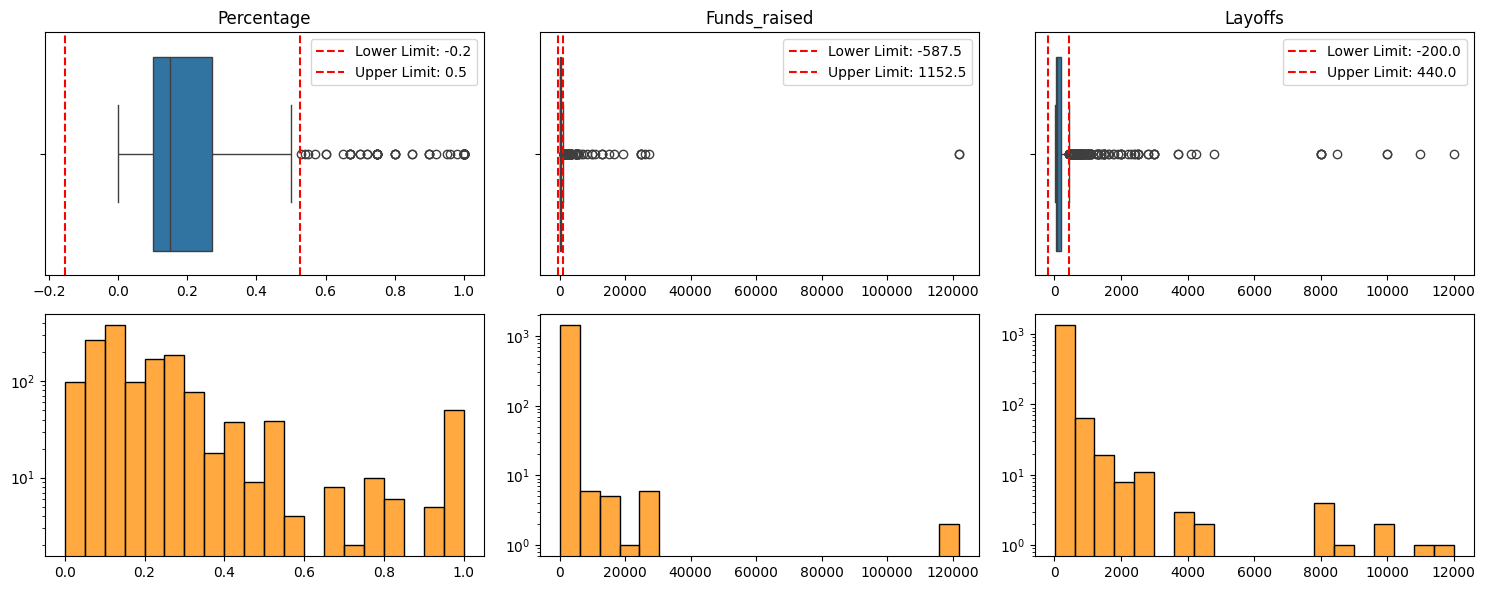

,Column,Number of Outliers,% Outliers,Lower Limit,Upper Limit
0,Percentage,87,5.9,-0.2,0.5
1,Funds_Raised,158,10.8,-587.5,1152.5
2,Layoffs,164,11.2,-200.0,440.0


In [ ]:
outlier_col = df.select_dtypes(include = 'float').columns
detect_outliers(df, outlier_col)

In [ ]:
# Removing outliers
clean_df = df.query('Percentage < 0.6 and Funds_Raised < 1108.2 and Layoffs < 416.2')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 2 to 3483
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1145 non-null   object 
 1   Location_HQ   1145 non-null   object 
 2   Industry      1145 non-null   object 
 3   Percentage    1145 non-null   float64
 4   Date          1145 non-null   object 
 5   Funds_Raised  1145 non-null   float64
 6   Stage         1145 non-null   object 
 7   Country       1145 non-null   object 
 8   Layoffs       1145 non-null   float64
dtypes: float64(3), object(6)
memory usage: 89.5+ KB


# Distribution of Layoffs across Industries

In [ ]:
# Box plot distribution of layoffs across industries
fig_industries_box = px.box(
    clean_df, 
    x = 'Industry', 
    y = 'Layoffs',
    title = 'Distribution of Layoffs Across Industries',
    color = 'Industry'
)

fig_industries_box.update_layout(title_x = 0.5)

fig_industries_box.show()

# Layoffs over time

In [ ]:
# Convert the 'Date' column to a datetime format
clean_df.loc[:, 'Date'] = pd.to_datetime(clean_df['Date'])

# Group by date and sum the layoffs
date_layoffs = (
    clean_df
    .groupby('Date')['Layoffs']
    .sum()
    .reset_index()
)

# Time series plot for layoffs over time
fig_date = px.line(
    date_layoffs,
    x = 'Date',
    y = 'Layoffs',
    title = 'Trend of Layoffs',
    template = 'plotly_dark'
)

fig_date.update_layout(title_x = 0.5)
fig_date.update_traces(line_color = 'orange')

fig_date.show()

In [ ]:
# Calculate cumulative layoffs over time
df_sorted_date = clean_df.sort_values(by = 'Date')
df_sorted_date['Cumulative_Layoffs'] = df_sorted_date['Layoffs'].cumsum()

# Enhanced time series for cumulative layoffs over time
fig_cum_date = px.line(
    df_sorted_date,
    x = 'Date',
    y = 'Cumulative_Layoffs',
    title = 'Cumulative Layoffs Over Time',
    template = 'plotly_dark',
    labels = {'Cumulative_Layoffs': 'Cumulative Number of Layoffs'}
)

fig_cum_date.update_layout(title_x = 0.5)
fig_cum_date.update_traces(line = dict(color = 'red', width = 2.5))

fig_cum_date.show()

# Company Layoffs

In [ ]:
# Group by company and sum the layoffs
company_layoffs = (
    clean_df
    .groupby('Company')['Layoffs']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .reset_index()
)

# Bar chart for companies with the highest number of layoffs
fig_company = px.bar(
    company_layoffs,
    x = 'Company',
    y = 'Layoffs',
    title = 'Companies with the Highest Layoffs',
    color = company_layoffs.index.isin(company_layoffs.head(1).index).astype(str),
    color_discrete_map = {'False': 'blue', 'True': 'darkred'}
)

fig_company.update_layout(
    title_x = 0.5, 
    showlegend = False
)

fig_company.show()

# Company Stages During Layoffs

In [ ]:
# Group by stage and sum the layoffs
stage_layoffs = (
    clean_df
    .groupby('Stage')['Layoffs']
    .sum()
    .reset_index()
)

# Find the index of the row with the maximum 'Layoffs'
max_layoffs_index = stage_layoffs['Layoffs'].idxmax()

# Create a color array where only the maximum index is True and everything else False
colors = [i == max_layoffs_index for i in stage_layoffs.index]

# Histogram for distribution of company stages among the layoffs
fig_stage = px.bar(
    stage_layoffs,
    x = 'Stage',
    y = 'Layoffs',
    title = 'Amount of Layoffs Across Different Company Phases',
    color = colors,
    color_discrete_map = {False: 'blue', True: 'darkred'},
    labels = {'Stage': 'Company Stage'}
)

fig_stage.update_layout(title_x = 0.5, showlegend = False)

fig_stage.show()

In [ ]:
# Group by country and sum the layoffs
country_layoffs = (
    clean_df
    .groupby('Country')['Layoffs']
    .sum()
    .reset_index()
)

# Map visualization for countries with layoffs
fig_country = px.choropleth(
    country_layoffs, 
    locations = 'Country',
    locationmode = 'country names',
    hover_name = 'Country',
    title = 'Layoffs by Country',
    color = 'Layoffs',
    color_continuous_scale = px.colors.sequential.Plasma
)

fig_country.update_layout(title_x = 0.5)

fig_country.show()

# Report on U.S. Layoffs

In [ ]:
# Obtaining only US-related data
usa_clean_df = clean_df[clean_df['Country'] == 'United States']

# Comparing with uncleaned data
usa_df = df[df['Country'] == 'United States']

usa_clean_df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Layoffs
2,Vacasa,Portland,Travel,0.05,2024-02-28 00:00:00,834.0,Post-IPO,United States,320.0
3,Treasury Prime,SF Bay Area,Finance,0.40,2024-02-28 00:00:00,71.0,Series C,United States,40.0
6,Bumble,Austin,Consumer,0.30,2024-02-27 00:00:00,313.0,Post-IPO,United States,350.0
24,Voi,Stockholm,Transportation,0.12,2024-02-16 00:00:00,515.0,Series D,United States,120.0
26,Sonder,SF Bay Area,Travel,0.17,2024-02-15 00:00:00,839.0,Post-IPO,United States,106.0


In [ ]:
# Top industry layoffs in USA

top_industries_clean = (
    usa_clean_df
    .groupby('Industry')['Layoffs']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .reset_index()
)

top_industries_raw = (
    usa_df
    .groupby('Industry')['Layoffs']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .reset_index()
)

# Add 'Label' column to identify cleaned and raw data
top_industries_clean['Label'] = 'Cleaned Data'
top_industries_raw['Label'] = 'Raw Data'

# Combine the DataFrames
top_industries = (
    pd.concat([top_industries_clean, top_industries_raw])
    .sort_values(by = 'Layoffs', ascending = False)
)

# Create bar plot
fig_industries_compare = px.bar(
    top_industries,
    x = 'Industry',
    y = 'Layoffs',
    color = 'Label',
    title = 'US Industries with the Highest Workforce Reductions', 
    barmode = 'overlay',
    color_discrete_map = {'Raw Data': 'darkorange', 'Cleaned Data': 'blue'}
)

fig_industries_compare.update_layout(title_x = 0.5, legend = {'title': ''})

fig_industries_compare.show()